## 3. Cálculo de los rendimientos

Para una sucesión de precios $\{S_t\}_{t=0}^{n}$, el rendimiento simple $R_t$ se define como el el cambio porcentual
$$
R_t=\frac{S_t-S_{t-1}}{S_{t-1}}
$$
para $t=1,\ldots,n$.

Para el ejemplo en curso, la fórmula anterior se puede implementar para todos los precios de cierre de manera simultánea mediante

In [9]:
import yfinance as yf

msft = yf.Ticker("MSFT")

# get stock info
print(msft.info)

# get historical market data
hist = msft.history(period="5d")

{'zip': '98052-6399', 'sector': 'Technology', 'fullTimeEmployees': 181000, 'longBusinessSummary': 'Microsoft Corporation develops, licenses, and supports software, services, devices, and solutions worldwide. Its Productivity and Business Processes segment offers Office, Exchange, SharePoint, Microsoft Teams, Office 365 Security and Compliance, and Skype for Business, as well as related Client Access Licenses (CAL); Skype, Outlook.com, OneDrive, and LinkedIn; and Dynamics 365, a set of cloud-based and on-premises business solutions for organizations and enterprise divisions. Its Intelligent Cloud segment licenses SQL, Windows Servers, Visual Studio, System Center, and related CALs; GitHub that provides a collaboration platform and code hosting service for developers; and Azure, a cloud platform. It also offers support services and Microsoft consulting services to assist customers in developing, deploying, and managing Microsoft server and desktop solutions; and training and certificatio

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [5]:
from pandas_datareader import data as pdr

# import fix_yahoo_finance as yf
# yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo(["SPY", 'AAPL'], start="2017-01-01", end="2017-04-30")
data

Attributes   Adj Close                  Close                   High  \
Symbols            SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2017-01-03  206.871811  27.332472  225.240005  29.037500  225.830002   
2017-01-04  208.102493  27.301876  226.580002  29.004999  226.750000   
2017-01-05  207.937180  27.440723  226.399994  29.152500  226.580002   
2017-01-06  208.681122  27.746635  227.210007  29.477501  227.750000   
2017-01-09  207.992279  28.000780  226.460007  29.747499  227.070007   
...                ...        ...         ...        ...         ...   
2017-04-24  218.776535  33.947983  237.169998  35.910000  237.410004   
2017-04-25  220.049530  34.158329  238.550003  36.132500  238.949997   
2017-04-26  219.911148  33.957436  238.399994  35.919998  239.529999   
2017-04-27  220.095627  33.983429  238.600006  35.947498  238.949997   
2017-04-28  219.615952  33.950325  238.080002  35.912498  238.929993   

Attributes                    Low                   Open             \
Symbols          AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2017-01-03  29.082500  223.880005  28.690001  225.039993  28.950001   
2017-01-04  29.127501  225.610001  28.937500  225.619995  28.962500   
2017-01-05  29.215000  225.479996  28.952499  226.270004  28.980000   
2017-01-06  29.540001  225.899994  29.117500  226.529999  29.195000   
2017-01-09  29.857500  226.419998  29.485001  226.910004  29.487499   
...               ...         ...        ...         ...        ...   
2017-04-24  35.987499  234.559998  35.794998  237.179993  35.875000   
2017-04-25  36.224998  237.809998  35.967499  237.910004  35.977501   
2017-04-26  36.150002  238.350006  35.845001  238.509995  36.117500   
2017-04-27  36.040001  237.979996  35.827499  238.770004  35.980000   
2017-04-28  36.075001  237.929993  35.817501  238.899994  36.022499   

Attributes       Volume               
Symbols             SPY         AAPL  
Date                                  
2017-01-03   91366500.0  115127600.0  
2017-01-04   78744400.0   84472400.0  
2017-01-05   78379000.0   88774400.0  
2017-01-06   71559900.0  127007600.0  
2017-01-09   46939700.0  134247600.0  
...                 ...          ...  
2017-04-24  119209900.0   68537200.0  
2017-04-25   76698300.0   75486000.0  
2017-04-26   84702500.0   80164800.0  
2017-04-27   57410300.0   56985200.0  
2017-04-28   63532800.0   83441600.0  

[81 rows x 12 columns]

In [1]:
# Librerías a utilizar
import numpy as np
import datetime
import scipy.stats as stats
import matplotlib.pyplot as plt
# Importamos pandas
import pandas as pd
import pandas_datareader.data as web
pd.set_option('display.max_rows', 10)

In [2]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

<AxesSubplot:xlabel='Date'>

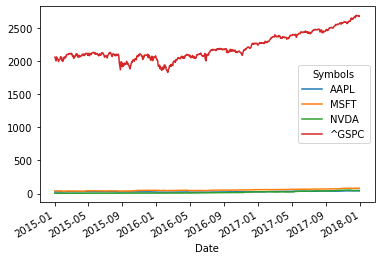

In [3]:
# Ejemplo: 'AAPL', 'MSFT', 'NVDA', '^GSPC'
ticker = ['AAPL', 'MSFT', 'NVDA', '^GSPC']
start = '2015-01-01'
end = '2017-12-31'
closes = get_adj_closes(tickers=ticker, start_date=start, end_date=end)
closes.plot()

In [4]:
closes

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,24.746000,41.269199,4.840062,2058.199951
2015-01-05,24.048861,40.889698,4.758313,2020.579956
2015-01-06,24.051128,40.289543,4.614050,2002.609985
2015-01-07,24.388376,40.801437,4.602027,2025.900024
2015-01-08,25.325434,42.001728,4.775144,2062.139893
...,...,...,...,...
2017-12-22,41.845699,81.429268,48.376072,2683.340088
2017-12-26,40.784081,81.324532,48.913666,2680.500000
2017-12-27,40.791252,81.619736,48.846771,2682.620117


In [9]:
# Función shift 
closes.shift(1)

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,24.746000,41.269199,4.840062,2058.199951
2015-01-06,24.048861,40.889698,4.758313,2020.579956
2015-01-07,24.051128,40.289543,4.614050,2002.609985
2015-01-08,24.388376,40.801437,4.602027,2025.900024
...,...,...,...,...
2017-12-22,41.845699,81.419754,48.529667,2684.570068
2017-12-26,41.845699,81.429268,48.376072,2683.340088
2017-12-27,40.784081,81.324532,48.913666,2680.500000


In [10]:
# Programar la función de rendimiento simple usando shift
(closes - closes.shift(1) )/ closes.shift(1)

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.009196,-0.016890,-0.018278
2015-01-06,0.000094,-0.014677,-0.030318,-0.008893
2015-01-07,0.014022,0.012705,-0.002606,0.011630
2015-01-08,0.038422,0.029418,0.037617,0.017888
...,...,...,...,...
2017-12-22,0.000000,0.000117,-0.003165,-0.000458
2017-12-26,-0.025370,-0.001286,0.011113,-0.001058
2017-12-27,0.000176,0.003630,-0.001368,0.000791


Ya está implementada la fórmula para obtener cambios porcentuales

In [11]:
# Comparar los resultados con la función pct_change
Rall1 = closes.pct_change(1)
Rall1

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028172,-0.009196,-0.016890,-0.018278
2015-01-06,0.000094,-0.014677,-0.030318,-0.008893
2015-01-07,0.014022,0.012705,-0.002606,0.011630
2015-01-08,0.038422,0.029418,0.037617,0.017888
...,...,...,...,...
2017-12-22,0.000000,0.000117,-0.003165,-0.000458
2017-12-26,-0.025370,-0.001286,0.011113,-0.001058
2017-12-27,0.000176,0.003630,-0.001368,0.000791


y la gráfica de los mismos se puede obtener como

<AxesSubplot:xlabel='Date'>

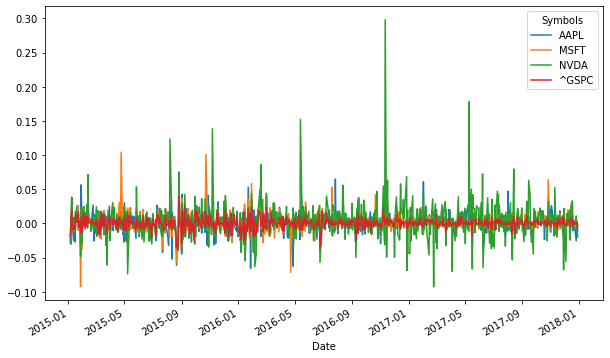

In [19]:
# Graficar los rendimientos simples
Rall1.plot(figsize=(10,6))

Donde se observa que el rendimiento tiene una tendencia mas o menos constante y, por tanto, se puede plantear la hipótesis de que se puede modelar usando un proceso estocástico estacionario en media.

Otro rendimiento usado con frecuencia es el rendimiento continuamente compuesto o rendimiento logaritmico. Éste, está definido como

$$
r_t=\ln\left(\frac{S_t}{S_{t-1}}\right).
$$

Es fácil darse cuenta que $r_t=\ln(1+R_t)$.

**Nota:** ver gráficamente que si $0\leq|x|\ll 1$, entonces $\ln(1+x)\approx x$.

Para este caso, la fórmula del rendimiento continuamente compuesto se translada facilmente a código Python.

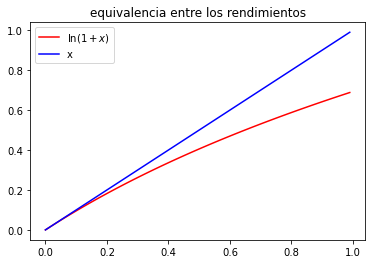

In [13]:
x = np.arange(0,1,0.01)
plt.plot(x,np.log(1+x),'r', label=r'$\ln(1+x)$')
plt.plot(x,x,'b', label='x')
plt.title('equivalencia entre los rendimientos')
plt.legend()
plt.show()

Por lo tanto, basados en el resultados anterior, podemos concluir que si $R_t<<1$ entonces:

$$
\begin{aligned}
&\text{Rendimiento simple}\\
&R_t = \frac{S_t-S_{t-1}}{S_{t-1}}
\end{aligned} \quad
\begin{aligned}
&\text{Rendimiento logarítmico}\\
&r_t = \ln\frac{S_t}{S_{t-1}}
\end{aligned} \longrightarrow r_t \approx R_t
$$

Ahora encontremos el rendimiento logarítmico:

In [15]:
# Cacular los rendimientos logarítmicos
rall = np.log(closes / closes.shift(1))
rall

Symbols,AAPL,MSFT,NVDA,^GSPC
Date,,,,
2015-01-02,NaN,NaN,NaN,NaN
2015-01-05,-0.028576,-0.009238,-0.017034,-0.018447
2015-01-06,0.000094,-0.014786,-0.030787,-0.008933
2015-01-07,0.013925,0.012625,-0.002609,0.011563
2015-01-08,0.037703,0.028993,0.036927,0.017730
...,...,...,...,...
2017-12-22,0.000000,0.000117,-0.003170,-0.000458
2017-12-26,-0.025697,-0.001287,0.011052,-0.001059
2017-12-27,0.000176,0.003623,-0.001369,0.000791


Notar que, en efecto, las diferencias entre $R_t$ y $r_t$ son muy pequeñas...

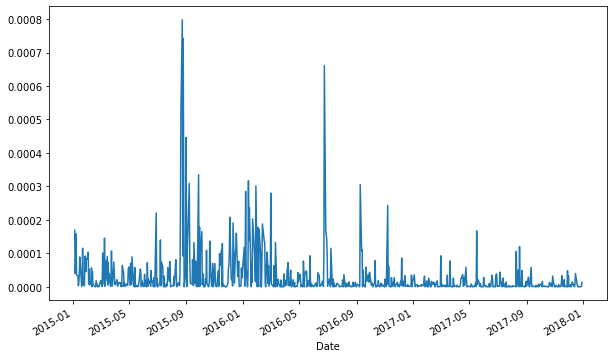

In [20]:
np.abs(rall-Rall1)['^GSPC'].plot(figsize=(10,6));

Escribamos funciones que devuelva los rendimientos diarios (simples y continuamente compuestos), dado un DataFrame de precios...

In [21]:
#rendimientos diarios simples
def simple_daily_ret(closes):
    return closes.pct_change(1).iloc[1:]

def log_dailiy_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

## ¿Porqué es más usado los rendimientos logarítmicos?

1. **log-normalidad**: si asumimos que los precios se distribuyen log-normalmente, entonces $log( 1 + r_i )$ se distribuye normalmente, lo cual es muy útil ya que muchos teoremas se supone normalidad.
2. Característica más importante es que son **aditivos en el tiempo.**  El producto de variables normalmente distribuidas no es una variable normal. Sin embargo la suma de variables normales no correlacionadas, sí que vuelve a ser una variable normal.
3. la **estabilidad numérica;** la adición de pequeñas cantidades es numéricamente fuerte, mientras que la multiplicación de números pequeños está sujeta a desbordamiento aritmético.

## 4. Gráficos útiles de los rendimientos

Tomemos como ejemplo la serie de precios de cierre de Microsoft y veamos (al menos gráficamente) si los rendimientos si son un proceso estocástico estacionario...

In [22]:
msftAC = closes['MSFT']
msftAC

Date
2015-01-02    41.269199
2015-01-05    40.889698
2015-01-06    40.289543
2015-01-07    40.801437
2015-01-08    42.001728
                ...    
2017-12-22    81.429268
2017-12-26    81.324532
2017-12-27    81.619736
2017-12-28    81.629257
2017-12-29    81.457848
Name: MSFT, Length: 755, dtype: float64

In [23]:
Rmsft = simple_daily_ret(msftAC)

In [24]:
short_rollmean_Rmsft = Rmsft.rolling(window=20).mean()
long_rollmean_Rmsft = Rmsft.rolling(window=100).mean()
short_rollstd_Rmsft = Rmsft.rolling(window=20).std()
long_rollstd_Rmsft = Rmsft.rolling(window=100).std()

In [29]:
%matplotlib notebook

<IPython.core.display.Javascript object>


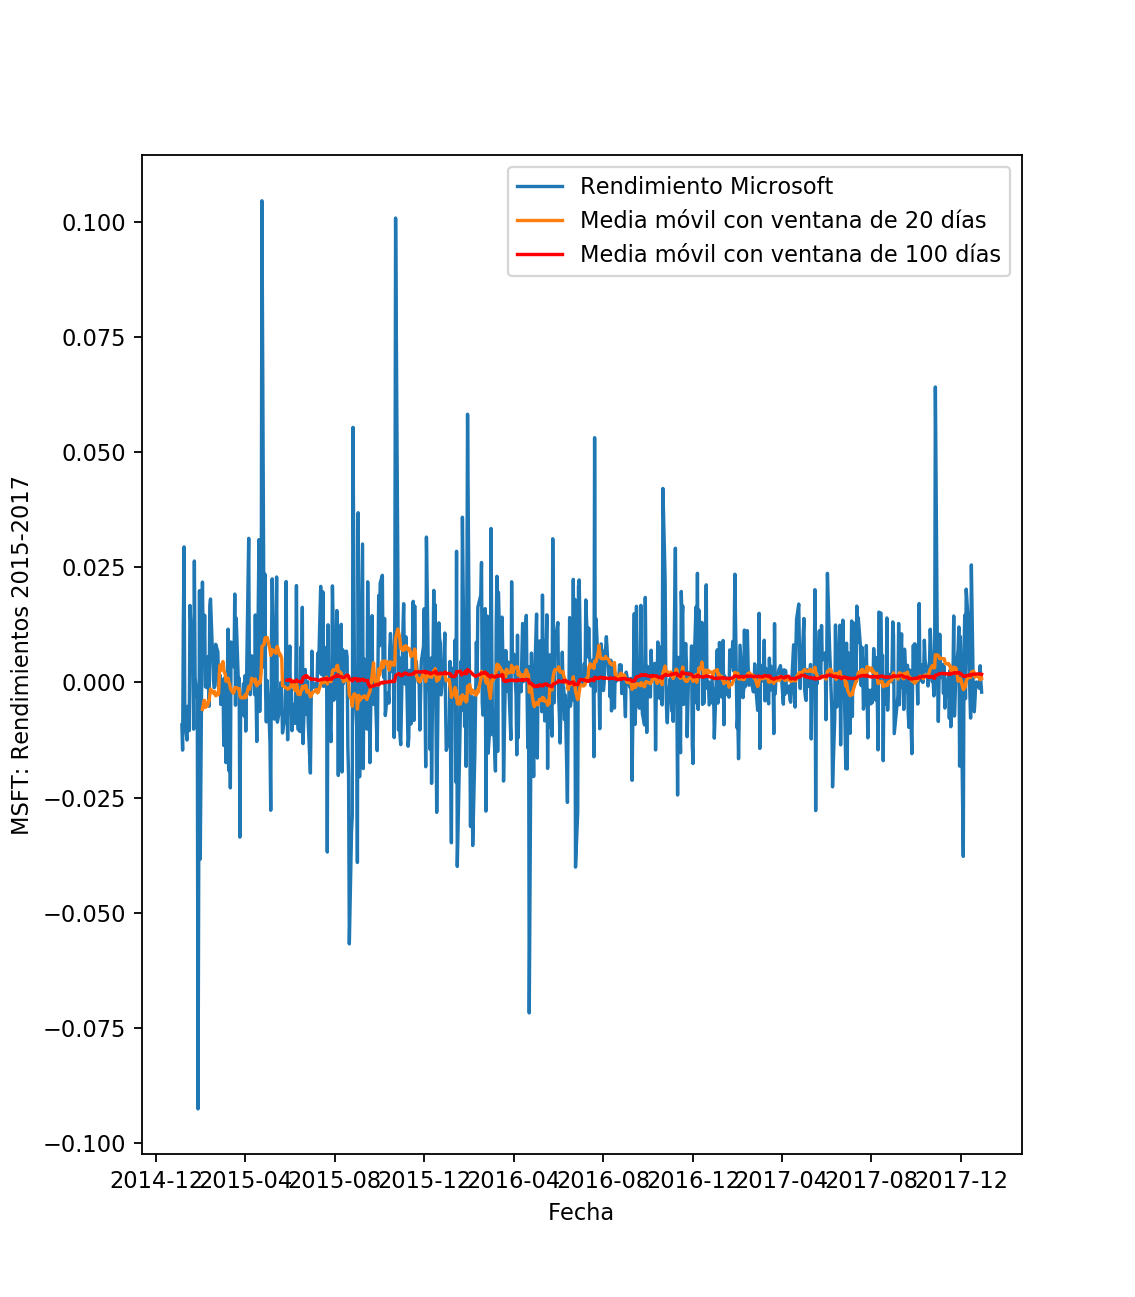

In [22]:
fig = plt.figure(figsize=(7,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollmean_Rmsft.index, short_rollmean_Rmsft, label = 'Media móvil con ventana de 20 días')
ax.plot(long_rollmean_Rmsft.index, long_rollmean_Rmsft, 'r', label = 'Media móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

<IPython.core.display.Javascript object>


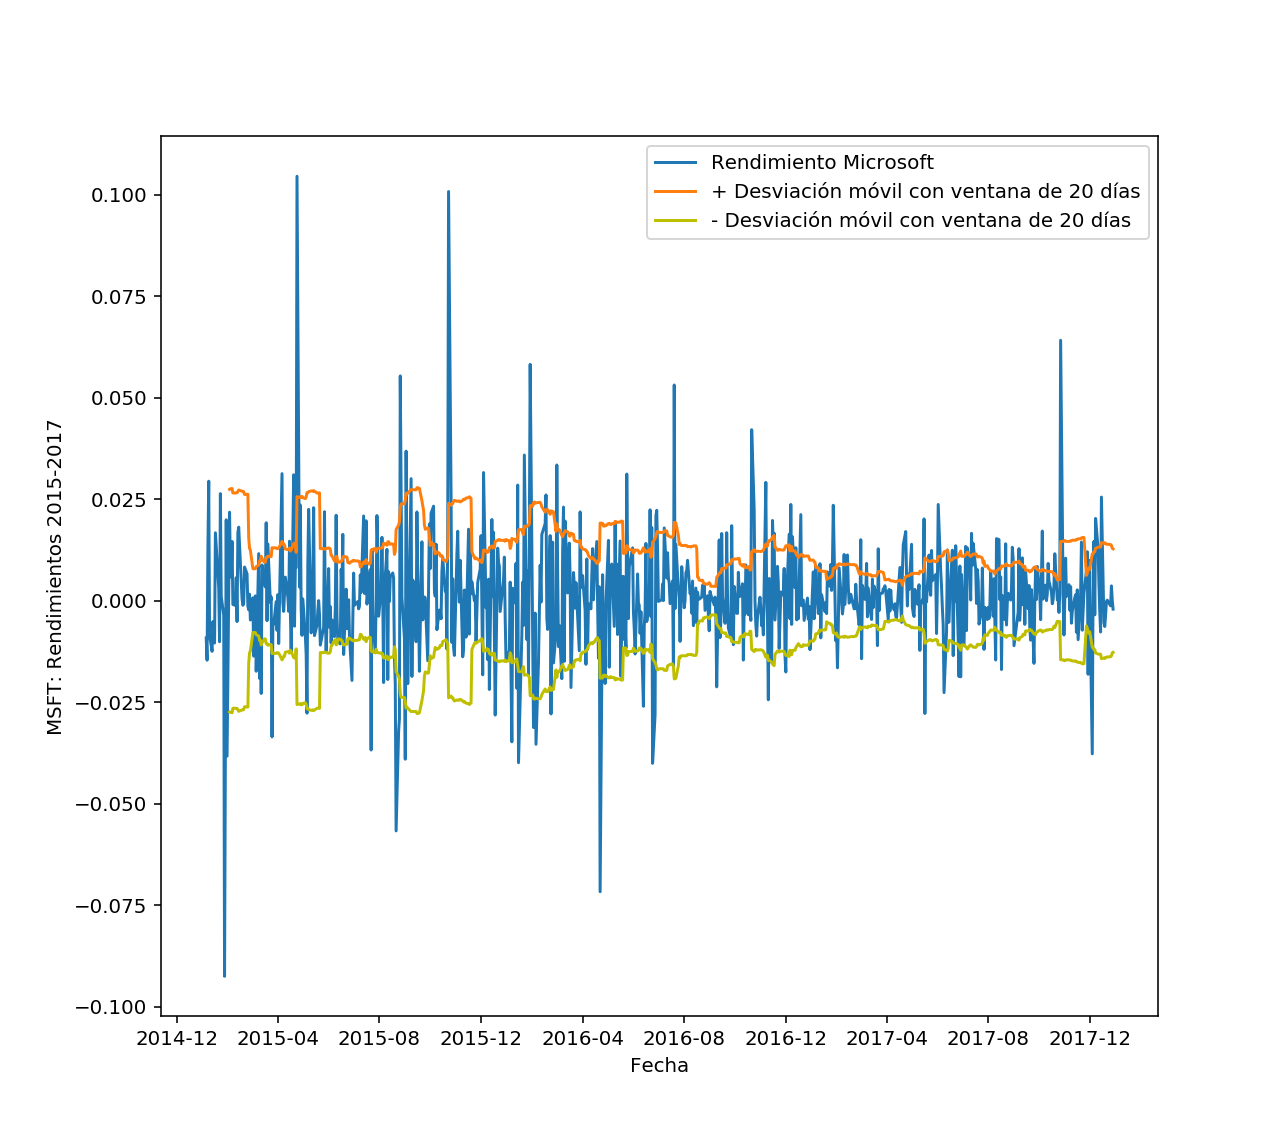

In [23]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(short_rollstd_Rmsft.index, short_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 20 días')
ax.plot(short_rollstd_Rmsft.index, -short_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 20 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

<IPython.core.display.Javascript object>


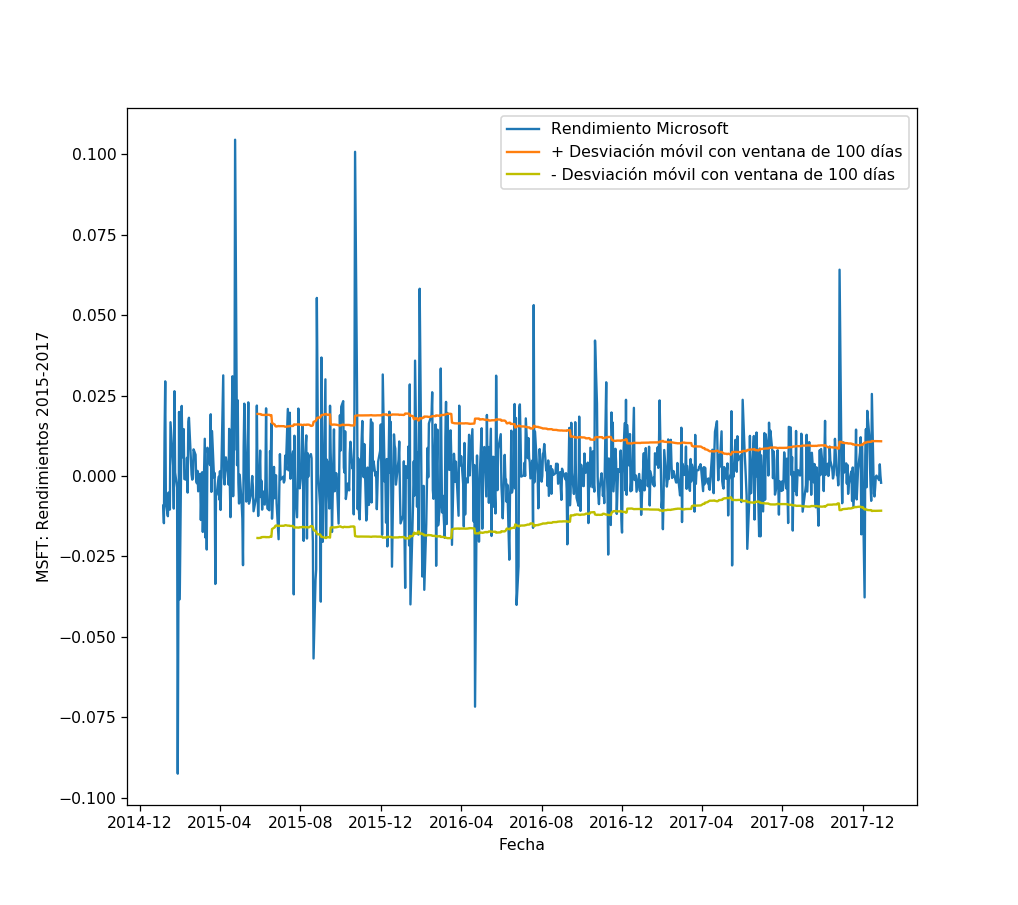

In [24]:
fig = plt.figure(figsize=(9,8))
ax = fig.add_subplot(1,1,1)
ax.plot(Rmsft.index, Rmsft, label = 'Rendimiento Microsoft')
ax.plot(long_rollstd_Rmsft.index, long_rollstd_Rmsft, label = '+ Desviación móvil con ventana de 100 días')
ax.plot(long_rollstd_Rmsft.index, -long_rollstd_Rmsft, 'y', label = '- Desviación móvil con ventana de 100 días')
ax.set_xlabel('Fecha')
ax.set_ylabel('MSFT: Rendimientos 2015-2017')
ax.legend(loc='best');

In [36]:
%matplotlib inline

No es estacionario...

Justificar simulación.

Se puede verificar también con un gráfico cuantil-cuantil (qq plot)

In [30]:
stats.t.fit(Rmsft)[:-2]

(2.6892318818043246,)

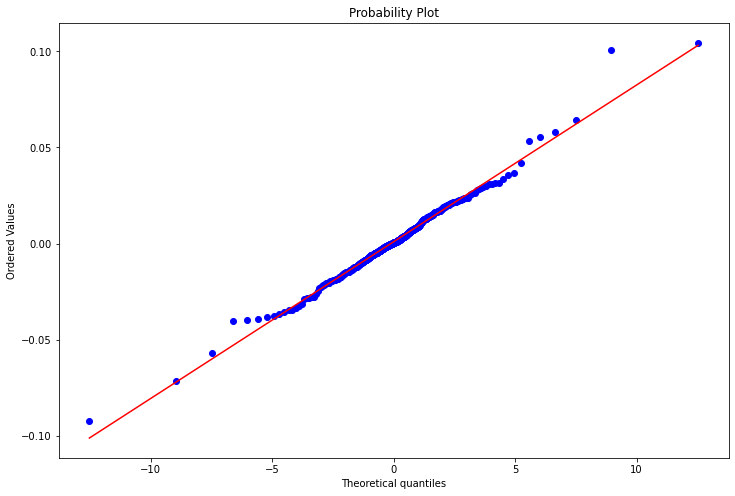

In [40]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1)
dist = 't'
stats.probplot(Rmsft, dist=getattr(stats,dist), 
               sparams=(getattr(stats, dist).fit(Rmsft)[:-2]), plot=ax);

## Está parte la voy a dejar como opcional, debido al tiempo que tenemos pero es muy interesante lo que acá se muestra, para los interesados echarle un ojo. Ahora saltamos a nuestro cuaderno de python de la clase 22.

Una más, con la librería seaborn... También se pueden instalar paquetes de python desde jupyter, usando el comando `!python -m pip install <package>`, como se ilustra a continuación

In [1]:
!python -m conda install seaborn

Solving environment: done

# All requested packages already installed.



In [41]:
import seaborn as sns

Otra manera de instalar una librería, es usar el método clásico de *Anaconda prompt* usando el comando `conda install -c anaconda seaborn`

/Users/odjaramilloz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/odjaramilloz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/odjaramilloz/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level func

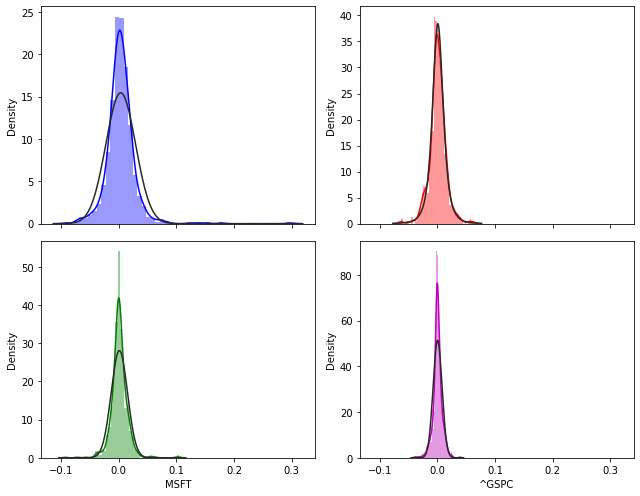

In [43]:
f, axes = plt.subplots(2, 2, figsize=(9, 7), sharex=True)
# Plot a simple histogram with binsize determined automatically
sns.distplot(Rall1.loc[:,'NVDA'], color="b", fit=stats.norm, norm_hist=True, ax=axes[0, 0])
sns.distplot(Rall1.loc[:,'AAPL'], color="r", fit=stats.t, norm_hist=True, ax=axes[0, 1])
sns.distplot(Rall1.loc[:,'MSFT'], color="g", fit=stats.norm, norm_hist=True, ax=axes[1, 0])
sns.distplot(Rall1.loc[:,'^GSPC'], color="m", fit=stats.norm, norm_hist=True, ax=axes[1, 1])
plt.tight_layout()

## 5. Gráficos de correlación

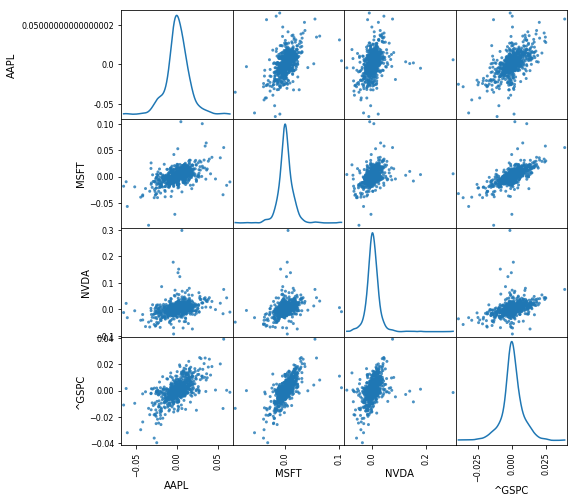

In [37]:
import pandas.plotting as cor
cor.scatter_matrix(Rall, diagonal='kde', alpha=0.8, figsize=(8,8));
# pd.tools.plotting.scatter_matrix(Rall, diagonal='kde', alpha=0.5, figsize=(8,8));

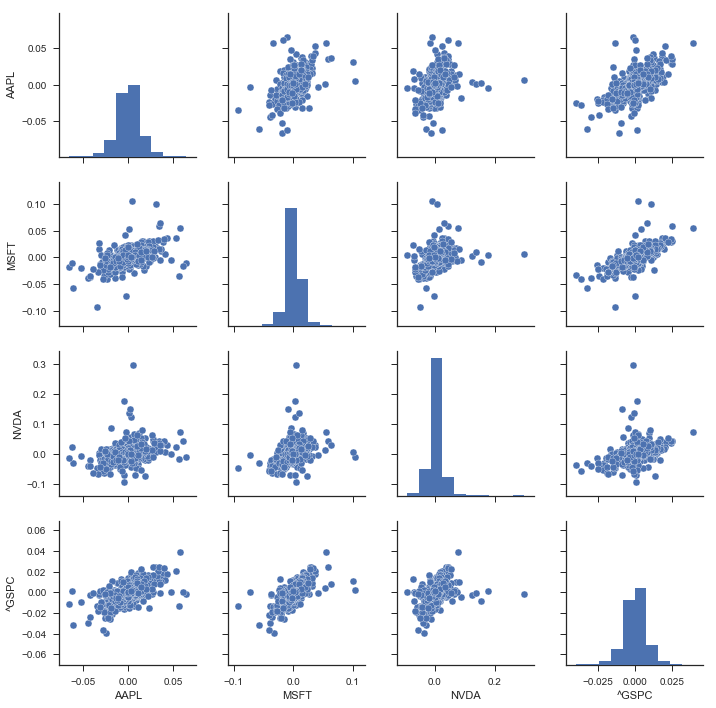

In [38]:
sns.set(style="ticks")
sns.pairplot(Rall);

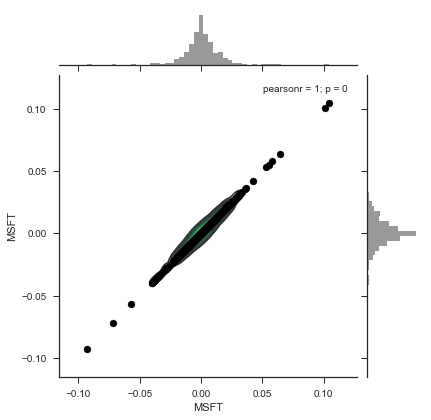

In [48]:
sns.jointplot("MSFT", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

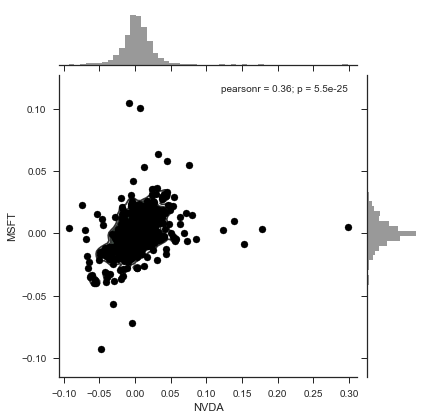

In [49]:
sns.jointplot("NVDA", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

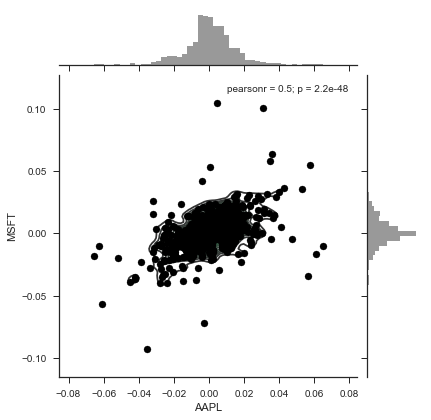

In [67]:
sns.jointplot("AAPL", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

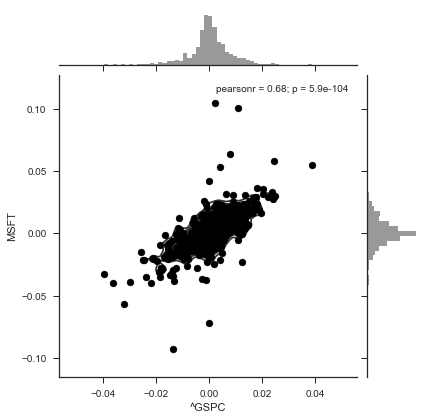

In [68]:
sns.jointplot("^GSPC", "MSFT",data=Rall, color="k").plot_joint(sns.kdeplot, zorder=0, n_levels=60);

In [44]:
Rall1.corr()

Symbols,AAPL,MSFT,NVDA,^GSPC
Symbols,,,,
AAPL,1.000000,0.497449,0.328940,0.602271
MSFT,0.497449,1.000000,0.363636,0.681244
NVDA,0.328940,0.363636,1.000000,0.397680
^GSPC,0.602271,0.681244,0.397680,1.000000


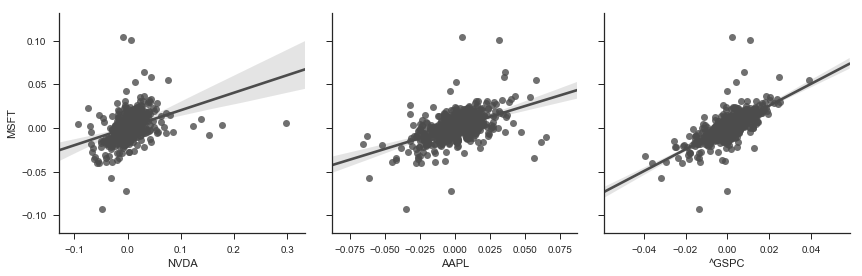

In [40]:
g = sns.PairGrid(Rall, y_vars=["MSFT"], x_vars=["NVDA", "AAPL", "^GSPC"], size=4)
g.map(sns.regplot, color=".3");

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar Jaramillo Z.
</footer>